# Video Game Sales with Ratings - Dữ liệu doanh số bán hàng các trò chơi điện tử cùng với xếp hạng tương ứng  

# Khái quát dữ liệu  

Được thúc đẩy bởi việc tìm kiếm trên web của Gregory Smith về Doanh số bán trò chơi điện tử VGChartz. Bộ dữ liệu này chỉ đơn giản là mở rộng số lượng biến với một web tìm kiếm khác từ Metacritic. Một vài đặc điểm nổi bật như sau:

+ Name: tên game  

+ Platform: nền tảng hoạt động    

+ Year_of_Release: năm phát hành game  

+ Genre: thể loại  

+ Publisher: nhà phát hành  

+ NA_Sales: doanh số bán hàng ở khu vực Bắc Mỹ

+ EU_Sales: doanh số bán hàng ở khu vực Châu Âu  

+  JP_Sales: doanh số bán hàng ở Nhật Bản  

+ Other_Sales: doanh số bán hàng ở các khu vực khác  

+ Global_Sales: doanh số bán hàng toàn cầu  

+ Critic_score: số điểm đánh giá (được tổng hợp và biên soạn bởi nhân viên Metacritic)  

+ Critic_count: số lượng đánh giá 

+ User_score: số điểm đánh giá (bởi người dùng đã đăng kí Metacritic)

+ User_count: Số lượng người dùng đã đưa ra đánh giá  

+ Developer: bên phát triển và chịu trách nhiệm tạo ra trò chơi  

+ Rating: những đánh giá theo trang ESRB  


### Lấy dữ liệu

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys


In [4]:
mydata = 'Video_Games_Sales.csv'
df = pd.read_csv(mydata)
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


### Kiểm tra kiểu dữ liệu từng cột

In [5]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

### Kiểm tra dữ liệu bị thiếu


In [6]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

### Thêm dữ liệu bị thiếu

In [7]:


df['Name'] = df['Name'].ffill().bfill()
df['Year_of_Release'] = df['Year_of_Release'].fillna(df['Year_of_Release'].min().max())
df['Genre'] = df['Genre'].ffill().bfill()
df['Publisher'] = df['Publisher'].ffill().bfill()
df['Critic_Score'] = df['Critic_Score'].fillna(df['Critic_Score'].mean())
df['Critic_Count'] = df['Critic_Count'].fillna(df['Critic_Count'].mean())
df['User_Score'] = df['User_Score'].fillna(6)
df['User_Count'] = df['User_Count'].fillna(df['User_Count'].mean())
df['Developer'] = df['Developer'].ffill().bfill()
df['Rating'] = df['Rating'].ffill().bfill()
df.isnull().sum()


Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

### Xóa các dữ liệu trùng lặp

In [8]:
df.drop_duplicates(inplace = True)


### Trực quan hóa dữ liệu (visualize)

### Số lượng người dùng đưa ra đánh giá cho từng nền tảng chơi game

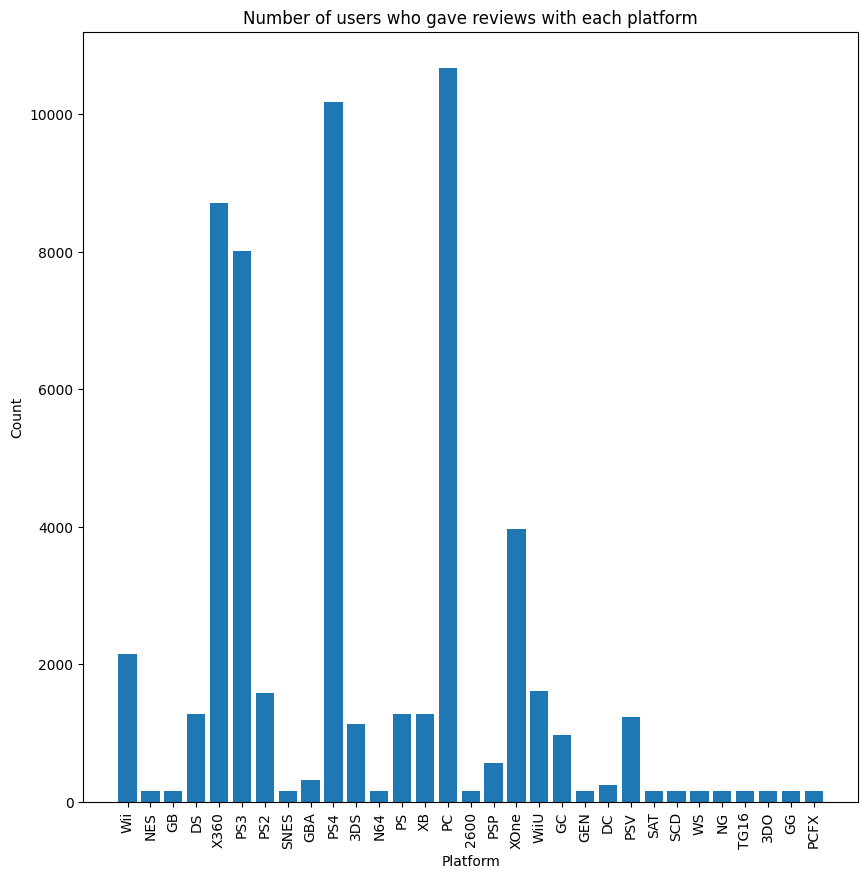

In [10]:
plt.figure(figsize=(10,10))
plt.bar(df['Platform'],df['User_Count'])
plt.xticks(rotation=90)
plt.xlabel("Platform")
plt.ylabel("Count")
plt.title('Number of users who gave reviews with each platform')
plt.show()

### Số lượng người dùng đánh giá qua các năm phát hành

Text(0, 0.5, 'Count')

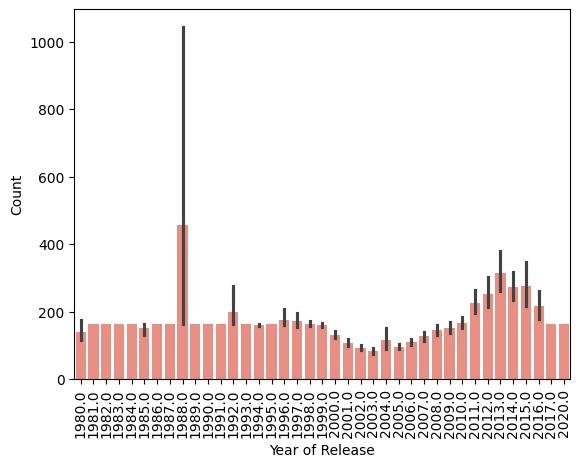

In [29]:
data = df['Name']
value_counts = data.value_counts()

sns.barplot(x='Year_of_Release', y ='User_Count', data = df, color = "salmon")
plt.xticks(rotation=90)
plt.xlabel("Year of Release")
plt.ylabel("Count")

### Số lượng người đưa ra đánh giá theo từng mức Rating (theo trang ESRB)

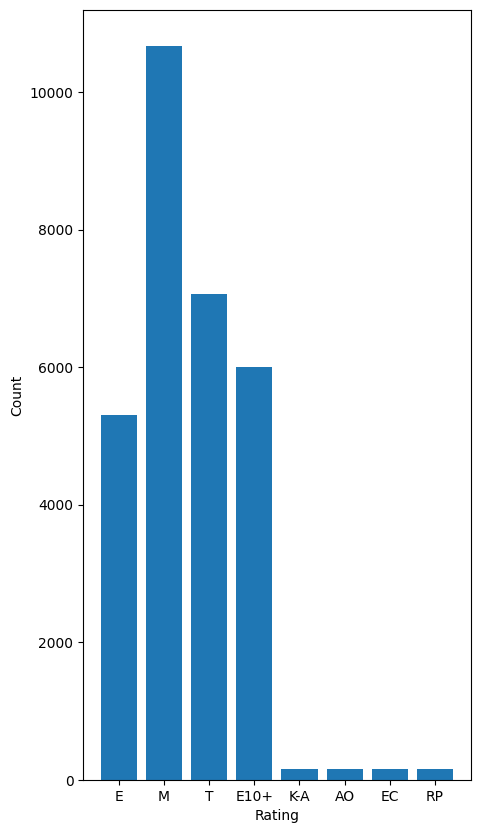

In [21]:
plt.figure(figsize=(5,10))
plt.bar(df['Rating'],df['User_Count'])
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### Ma trận tương quan về doanh thu bán hàng của các khu vực trên toàn cầu

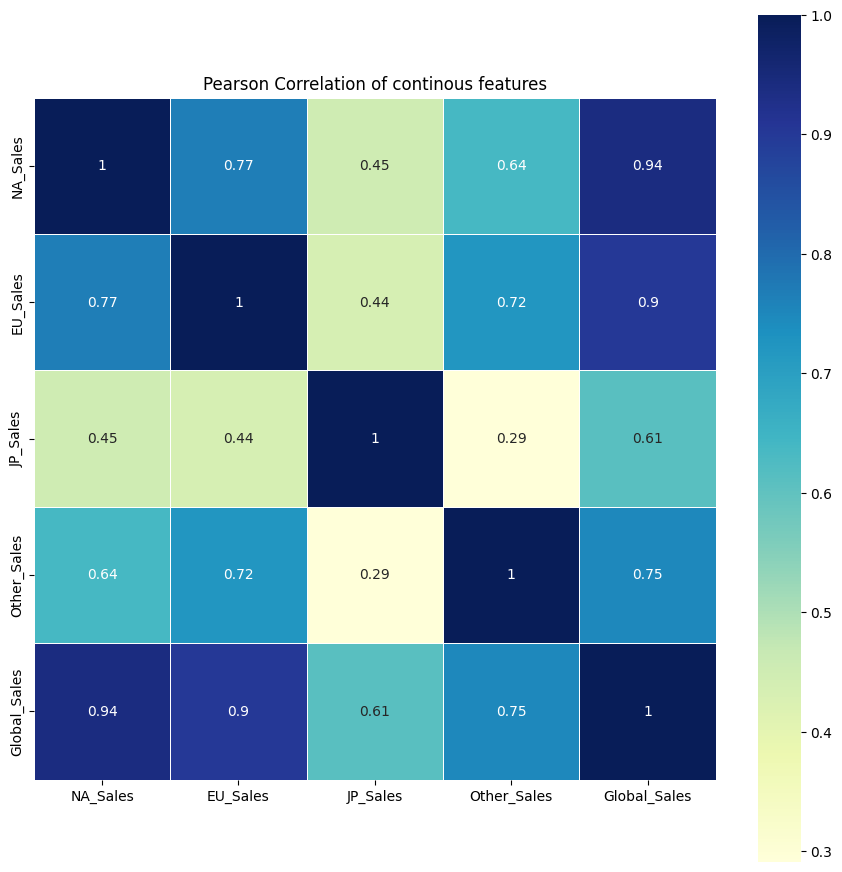

In [13]:
country_sales = [
                "NA_Sales", 
                "EU_Sales", 
                "JP_Sales", 
                "Other_Sales", 
                "Global_Sales", 
            ]
data = df[country_sales]
datacorr = data.corr()
plt.subplots(figsize=(11, 11))
plt.title('Pearson Correlation of continous features')
ax = sns.heatmap(datacorr, 
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlGnBu",
                 square=True
                )

### Top 10 tựa game có số lượt đánh giá nhiều nhất

In [23]:
top_10_critic=df.groupby('Name')['Critic_Count'].sum().reset_index().sort_values(by='Critic_Count',ascending=False).head(10)
top_10_critic

,Name,Critic_Count
6717,Need for Speed: Most Wanted,341.443284
9014,Spider-Man 2,252.000000
3743,Grand Theft Auto V,245.000000
2953,FIFA 14,237.443284
6148,Mortal Kombat,229.721642
5213,Lego Batman 3: Beyond Gotham,226.164926
2143,Diablo III,223.721642
2954,FIFA 15,220.804105
10137,The Sims 3,220.360821
10402,Tomb Raider: Legend,217.000000


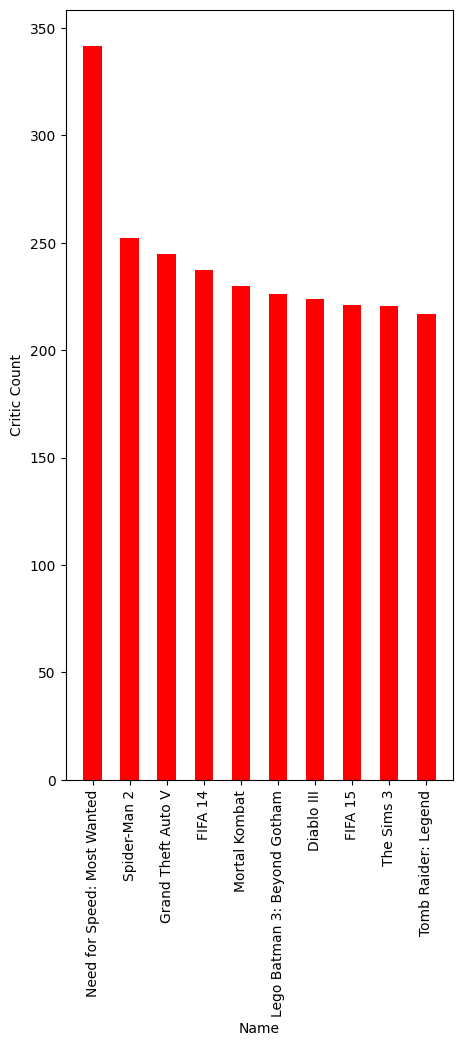

In [34]:
plt.figure(figsize=(5,10))
plt.xticks(rotation=90)
plt.bar(top_10_critic['Name'],top_10_critic['Critic_Count'],color = "red",width = 0.5)
plt.xlabel("Name")
plt.ylabel("Critic Count")
plt.show()